In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle

from scipy.stats import pearsonr as pr
from scipy.stats import spearmanr as sr
from sklearn.metrics import r2_score

#### Compare performance of different models

In [21]:
r2_scores = pickle.load(open('../../../results/topt_models/r2_on_test_topt_all_types.pkl','rb'))
r2_scores = {r2_scores[1][i]:r2_scores[0][i] for i in range(len(r2_scores[0]))}
print(r2_scores)

{'iFeatures': [0.37211313707947946], 'UniRep': [0.1586008073967482], 'Type1-scratch': [0.3997920986040495, 0.3358497746311945, 0.3924703214200951, 0.3743029295786101, 0.4091805123610225, 0.4086558250245357, 0.366856437960731, 0.43290626253444486, 0.3669736455687269, 0.37778554620419913], 'Type2-scratch': [0.267849949721668, 0.2717763038175439, 0.20339083663571056, 0.2638848062715895, 0.28122739907606265, 0.23958428602598836, 0.26157360018028, 0.15249636056493066, 0.2889785166188793, 0.24055494703651148], 'Type1-TL1': [0.5236931031005095, 0.5357039485041445, 0.5367692848794641, 0.5429818763208936, 0.5212716385313025, 0.531190561448953, 0.5318712754201425, 0.4782067744357239, 0.5260603615543262, 0.5435458095575127], 'Type1-TL6': [0.5248687138127488, 0.5684075812138791, 0.5263005662222928, 0.5239569608751211, 0.5510492487904015, 0.5193410030660439, 0.4896528185011023, 0.5297945061375078, 0.5365952748985379, 0.5050962098974101], 'Type2-TL1': [0.49398535925837295, 0.48871417456015964, 0.505

In [53]:
data_frozen_all = pickle.load(open('../../../results/topt_models/TL_RES1_fronzen_all_layers.pkl','rb'))

In [42]:
xticks = [
  'iFeatures',
  'UniRep',
  'From Scratch',
  'FrozenAll',
  'FrozenCov',
  'TuneAll']

r2s = [
    r2_scores['iFeatures'],
    r2_scores['UniRep'],
    r2_scores['Type1-scratch'],
    [data_frozen_all['r2_score']],
    r2_scores['Type1-TL6'],
    r2_scores['Type1-TL1'],
]
rmses = []
for lst in r2s:
    new_lst = [np.sqrt((1-r2)*np.var(data_frozen_all['true_topt'])) for r2 in lst]
    rmses.append(new_lst)

In [57]:
def do_plot(data,ylabel,outname=None):
    plt.figure(figsize=(4,3))
    pos = np.arange(len(data))
    cs = ['#fc8d59' if 'Type2' in str(tick) else '#1f78b4'for tick in xticks]
    plt.bar(pos,[np.mean(item) for item in data],zorder=0,color=cs)
    for i,lst in enumerate(data):
        plt.scatter(np.array([pos[i]]*len(lst))+np.random.normal(0,0.1,size=len(lst)),lst,color='k',s=6)
    plt.xticks(pos,xticks,rotation=45,ha='right')
    plt.ylabel(ylabel)
    if outname is not None: plt.savefig(outname,bbox_inches='tight')
    plt.show()

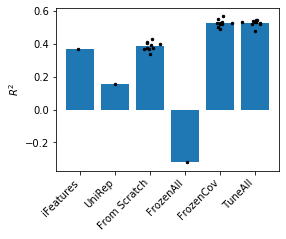

In [58]:
do_plot(r2s,'$R^2$','../../../results/figures/topt_r2_scores_different_models.pdf')

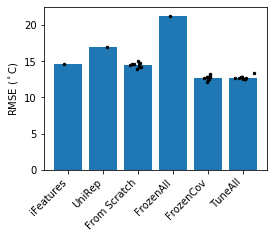

In [59]:
do_plot(rmses,'RMSE ($^\circ$C)','../../../results/figures/topt_rmse_scores_different_models.pdf')

#### Plot best model

In [61]:
data = pickle.load(open('../../../results/topt_models/transfer_topt_test_score.pkl','rb'))

In [76]:
best_r2 = -np.inf
for i,name in enumerate(data[0]):
    if 'RES1' not in name: continue
    if data[2][i]>best_r2: 
        best_r2 = data[2][i]
        best_yp = data[1][i]
        best_name = data[0][i]
print(best_name,best_r2)

TL6_RES1_ogt_onehot_SameAnces/bestmodel6.h5 0.5684075812138791


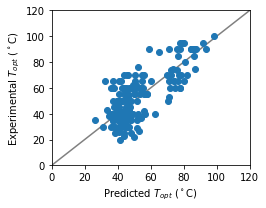

In [81]:
plt.figure(figsize=(3.8,3))
lim = [0,120]
plt.scatter(best_yp,data_frozen_all['true_topt'],zorder=1)
plt.plot(lim,lim,zorder=0,c='gray')
plt.xlim(lim)
plt.ylim(lim)

plt.xlabel('Predicted $T_{opt}$ ($^\circ$C)')
plt.ylabel('Experimental $T_{opt}$ ($^\circ$C)')
plt.tight_layout()
plt.savefig('../../../results/figures/best_topt_tl_model_TL6_RES1_bestmodel6.pdf')
plt.show()